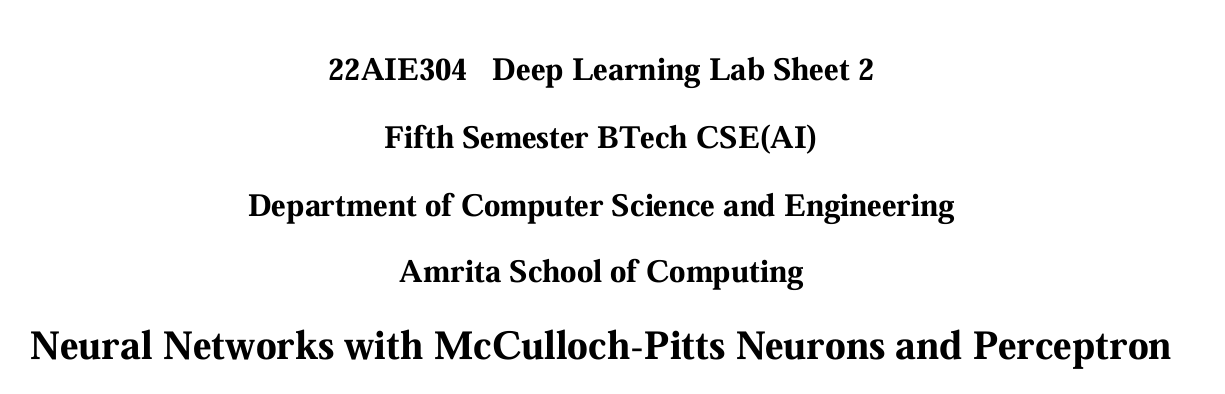

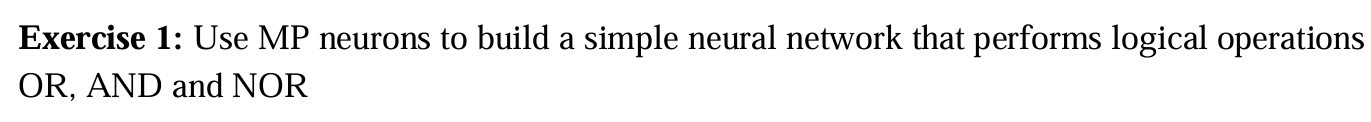

In [ ]:
import numpy as np

def MP_neuron(weights, bias, inputs):
    z = np.dot(weights, inputs) + bias
    return 1 if z >= 0 else 0

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

# OR
weights = np.array([1, 1])
bias = -0.5

print("OR Operation")
for inp in inputs:
    print(f"Input: {inp}, Output: {MP_neuron(weights, bias, inp)}")


# AND
weights = np.array([1, 1])
bias = -1.5

print("\n\nAND Operation")
for inp in inputs:
    print(f"Input: {inp}, Output: {MP_neuron(weights, bias, inp)}")


# NOR
weights = np.array([-1, -1])
bias = 0.5

print("\n\nNOR Operation")
for inp in inputs:
    print(f"Input: {inp}, Output: {MP_neuron(weights, bias, inp)}")

OR Operation
Input: [0, 0], Output: 0
Input: [0, 1], Output: 1
Input: [1, 0], Output: 1
Input: [1, 1], Output: 1


AND Operation
Input: [0, 0], Output: 0
Input: [0, 1], Output: 0
Input: [1, 0], Output: 0
Input: [1, 1], Output: 1


NOR Operation
Input: [0, 0], Output: 1
Input: [0, 1], Output: 0
Input: [1, 0], Output: 0
Input: [1, 1], Output: 0


# **NOR cannot be learned by McCulloch-Pitts (MP) neuron, as it can only learn linearly seperable data, while NOR data points are Non-Linear in nature.**

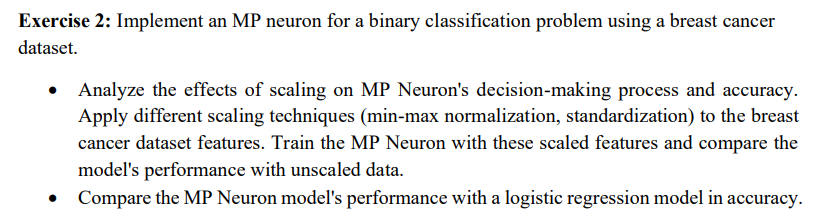

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)

def MP_neuron(weights, bias, inputs):
    weighted_sum = np.dot(weights, inputs) + bias
    return 1 if weighted_sum >= 0 else 0

def train_MP_neuron(X_train, y_train, threshold=0):
    weights = np.ones(X_train.shape[1])
    bias = threshold
    predictions = [MP_neuron(weights, bias, x) for x in X_train]
    accuracy = np.mean(predictions == y_train)
    return accuracy

accuracy_unscaled = train_MP_neuron(X_train, y_train)
accuracy_minmax = train_MP_neuron(X_train_minmax, y_train)
accuracy_std = train_MP_neuron(X_train_std, y_train)

print(f"Accuracy with unscaled data: {accuracy_unscaled}")
print(f"Accuracy with min-max scaled data: {accuracy_minmax}")
print(f"Accuracy with standardized data: {accuracy_std}")

Accuracy with unscaled data: 0.6256281407035176
Accuracy with min-max scaled data: 0.6256281407035176
Accuracy with standardized data: 0.11557788944723618


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_unscaled = logreg.predict(X_test)
accuracy_logreg_unscaled = accuracy_score(y_test, y_pred_unscaled)

logreg_minmax = LogisticRegression()
logreg_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = logreg_minmax.predict(X_test_minmax)
accuracy_logreg_minmax = accuracy_score(y_test, y_pred_minmax)

logreg_std = LogisticRegression()
logreg_std.fit(X_train_std, y_train)
y_pred_std = logreg_std.predict(X_test_std)
accuracy_logreg_std = accuracy_score(y_test, y_pred_std)

print(f"Logistic Regression accuracy with unscaled data: {accuracy_logreg_unscaled}")
print(f"Logistic Regression accuracy with min-max scaled data: {accuracy_logreg_minmax}")
print(f"Logistic Regression accuracy with standardized data: {accuracy_logreg_std}")

Logistic Regression accuracy with unscaled data: 0.9707602339181286
Logistic Regression accuracy with min-max scaled data: 0.9649122807017544
Logistic Regression accuracy with standardized data: 0.9824561403508771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


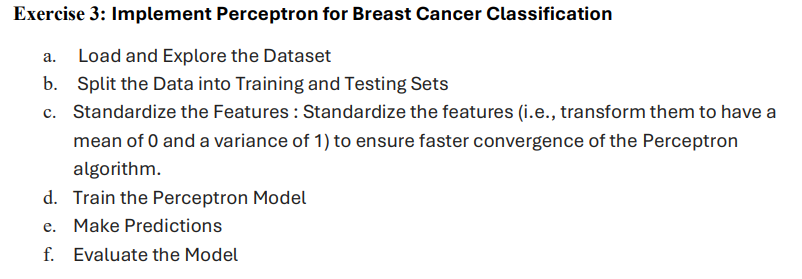

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

perceptron = Perceptron()
perceptron.fit(X_train_std, y_train)
y_pred = perceptron.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy}")

Perceptron Accuracy: 0.9649122807017544


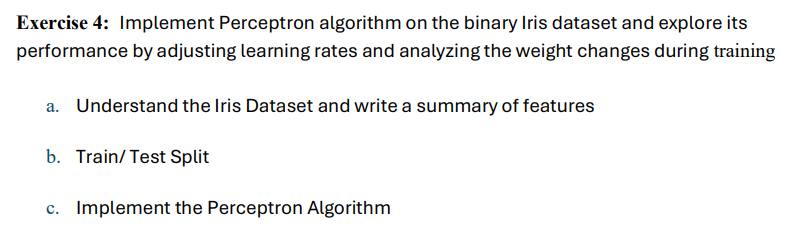

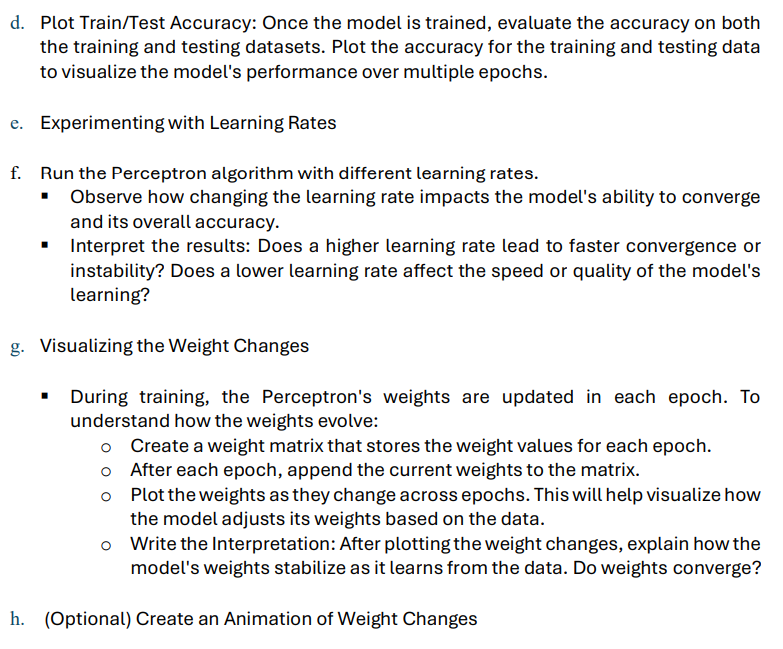

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
binary_mask = (y == 0) | (y == 1)
X_binary, y_binary = X[binary_mask], y[binary_mask]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

learning_rates = [0.01, 0.1, 1]
for lr in learning_rates:
    perceptron = Perceptron(eta0=lr)
    perceptron.fit(X_train_std, y_train)
    y_pred_train = perceptron.predict(X_train_std)
    y_pred_test = perceptron.predict(X_test_std)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(f"Learning Rate {lr} - Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")

Learning Rate 0.01 - Train Accuracy: 1.0, Test Accuracy: 1.0
Learning Rate 0.1 - Train Accuracy: 1.0, Test Accuracy: 1.0
Learning Rate 1 - Train Accuracy: 1.0, Test Accuracy: 1.0


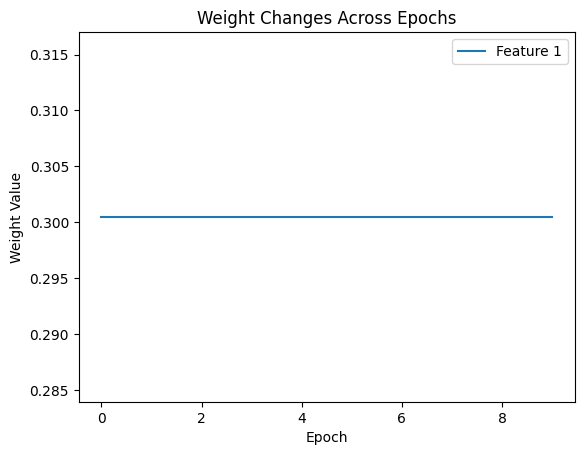

In [ ]:
weights = []
for epoch in range(10):
    perceptron.partial_fit(X_train_std, y_train, classes=np.unique(y_train))
    weights.append(perceptron.coef_.copy())

weights = np.array(weights)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i, 0], label=f"Feature {i+1}")
plt.title("Weight Changes Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend()
plt.show()